In [1]:
from typing import Annotated
from pydantic import BaseModel

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from dotenv import load_dotenv
from IPython.display import display, Image

import gradio as gr
from langchain_openai import ChatOpenAI

import random

In [2]:
nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

In [3]:
load_dotenv(override=True)

True

## Step 1: Define the State object

In [4]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

## Step 2: Start the Graph Builder with this State class

In [5]:
graph_builder = StateGraph(State)

## Step 3: Create a Node

A node can be any python function.

The reducer that we set before gets automatically called to combine this response with previous responses

In [6]:
def our_first_node(old_state: State) -> State:

    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content": reply}]

    new_state = State(messages=messages)
    return new_state

graph_builder.add_node("first_node", our_first_node)

## Step 4: Create Edges

In [ ]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

## Step 5: Compile the Graph

In [8]:
graph = graph_builder.compile()

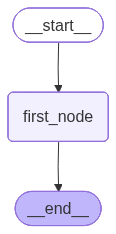

In [9]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
def chat(user_input: str, history):
    message = {"role": "user", "content": user_input}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content

gr.ChatInterface(chat, type='messages').launch()

* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='d66f7f5d-4112-4a19-9bd8-31eba07117c2'), AIMessage(content='Toasters are smelly', additional_kwargs={}, response_metadata={}, id='2493ba7c-9a80-45a6-8fe5-6d74d23d49ce')]}
{'messages': [HumanMessage(content='??', additional_kwargs={}, response_metadata={}, id='66eea67f-3bf9-4dae-b7dd-5077c17e6d5d'), AIMessage(content='Muffins are outrageous', additional_kwargs={}, response_metadata={}, id='18ff92d5-0a25-43f0-9e94-0ef252c9fa6d')]}


In [16]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [17]:
graph_builder = StateGraph(State)

In [18]:
llm = ChatOpenAI(model='gpt-4o-mini')

def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

graph_builder.add_node("chatbot", chatbot_node)

In [19]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

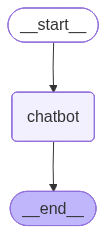

In [20]:
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
def chat(user_input: str, history):
    initial_state = State(messages=[{"role": "user", "content": user_input}])
    result = graph.invoke(initial_state)
    return result['messages'][-1].content

In [22]:
gr.ChatInterface(chat, type='messages').launch()

* Running on local URL:  http://127.0.0.1:7866
* To create a public link, set `share=True` in `launch()`.
